In [23]:
import os
import math
import numpy as np
from scipy.io import loadmat
import pandas as pd
import matplotlib.pyplot as plt

# Keras modules
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.utils import to_categorical
from keras.models import Sequential
from keras import optimizers
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense

### Pre-process the Dataset

In [4]:


# Load the datasets
sample_data = loadmat('Digit_Dataset.mat')
label_data = pd.read_csv("Digit_Dataset_Labels.csv")

# Get data from the datasets
X_train_orig = sample_data['Image'][0, 0][0]
X_test_orig = sample_data['Image'][0, 0][1]
Y_train_orig = label_data.values[:, 0]
Y_test_orig = label_data.values[:, 1]

# Print details of the orignal data
print("X_train_orig shape: " + str(X_train_orig.shape))
print("X_test_orig shape: " + str(X_test_orig.shape))
print("Y_train_orig shape: " + str(Y_train_orig.shape))
print("Y_test_orig shape: " + str(Y_test_orig.shape), "\n")

# Reshape the input data for keras
split_fraction = 0.5     # should be greater than 0.5
train_set_len = math.ceil((X_train_orig.shape[3] + X_test_orig.shape[3]) * split_fraction)
test_set_len = X_train_orig.shape[3] + X_test_orig.shape[3] - math.floor((X_train_orig.shape[3] + X_test_orig.shape[3]) * split_fraction)
X_train = np.zeros((train_set_len, X_train_orig.shape[0], X_train_orig.shape[1], X_train_orig.shape[2]))
X_test = np.zeros((test_set_len, X_train_orig.shape[0], X_train_orig.shape[1], X_train_orig.shape[2]))
Y_train = np.zeros((train_set_len, 1))
Y_test = np.zeros((test_set_len, 1))

for i in range(train_set_len + test_set_len):
    if i < train_set_len:
        try:
            X_train[i] = X_train_orig[:, :, :, i]
        except:
            X_train[i] = X_test_orig[:, :, :, i - train_set_len]  

        try:
            Y_train[i] = Y_train_orig[i]
        except:
            Y_train[i] = Y_test_orig[i - train_set_len]
    else:
        X_test[i - train_set_len] = X_test_orig[:, :, :, i - train_set_len]
        Y_test[i - train_set_len] = Y_test_orig[i - train_set_len]
Y_train = to_categorical(Y_train, num_classes=10, dtype='float32')
Y_test = to_categorical(Y_test, num_classes=10, dtype='float32')

# Print details of the reshaped data
print("X_train shape: " + str(X_train.shape))
print("X_test shape: " + str(X_test.shape))
print("Y_train shape: " + str(Y_train.shape))
print("Y_test shape: " + str(Y_test.shape))

# Create an image generator class
imgGentrain = ImageDataGenerator()

imgGentest = ImageDataGenerator()

train_batch = imgGentrain.flow(
    x=X_train,
    y=Y_train,
    batch_size=32,
    shuffle=True,
    seed=1)
test_batch = imgGentest.flow(
    x=X_test,
    y=Y_test,
    batch_size=32,
    shuffle=True,
    seed=2)

X_train_orig shape: (28, 28, 1, 1000)
X_test_orig shape: (28, 28, 1, 1000)
Y_train_orig shape: (1000,)
Y_test_orig shape: (1000,) 

X_train shape: (1000, 28, 28, 1)
X_test shape: (1000, 28, 28, 1)
Y_train shape: (1000, 10)
Y_test shape: (1000, 10)


### Example of an Image

y = [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


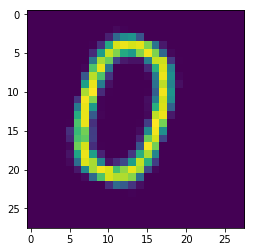

In [5]:
index = 3    # just some image for preview
plt.imshow(X_train[index, :, :, 0])
print("y = " + str(np.squeeze(Y_train[index, :])))

In [27]:
# Optimizer used = Adam

# Create a model
model = Sequential()

# Add a convolutional layer
model.add(Conv2D(filters=32, kernel_size=5, strides=(1, 1), padding='valid', input_shape=(28, 28, 1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'))

# 2. Add a convolution layer
model.add(Conv2D(filters=16, kernel_size=3, strides=(1, 1), padding='same'))
model.add(Activation('sigmoid'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(1, 1)))
    
# Flatten the output
model.add(Flatten())

# Add a dense layer
model.add(Dense(10))
model.add(Activation('softmax'))
optAdam = optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=True)
model.compile(optimizer=optAdam,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit_generator(
    generator=train_batch,
    steps_per_epoch=len(train_batch),
    epochs=50,
    validation_data=test_batch,
    validation_steps=len(test_batch))


Epoch 1/50
32/32 [==============================] - 2s 74ms/step - loss: 2.2605 - acc: 0.2091 - val_loss: 1.8898 - val_acc: 0.3600
Epoch 2/50
32/32 [==============================] - 1s 44ms/step - loss: 1.6496 - acc: 0.4774 - val_loss: 1.5598 - val_acc: 0.4880
Epoch 3/50
32/32 [==============================] - 1s 36ms/step - loss: 1.2801 - acc: 0.5938 - val_loss: 1.4129 - val_acc: 0.4970
Epoch 4/50
32/32 [==============================] - 1s 37ms/step - loss: 1.0078 - acc: 0.7090 - val_loss: 1.0580 - val_acc: 0.6640
Epoch 5/50
32/32 [==============================] - 1s 37ms/step - loss: 0.8166 - acc: 0.7725 - val_loss: 0.8752 - val_acc: 0.7470
Epoch 6/50
32/32 [==============================] - 1s 37ms/step - loss: 0.6667 - acc: 0.8388 - val_loss: 0.8234 - val_acc: 0.7770
Epoch 7/50
32/32 [==============================] - 1s 39ms/step - loss: 0.5593 - acc: 0.8682 - val_loss: 0.7035 - val_acc: 0.8030
Epoch 8/50
32/32 [==============================] - 2s 59ms/step - loss: 0.4617 - a

In [21]:
#Optimizer used = RMSprop

# Create a model
model = Sequential()

# Add a convolutional layer
model.add(Conv2D(filters=32, kernel_size=5, strides=(1, 1), padding='valid', input_shape=(28, 28, 1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'))

# 2. Add a convolution layer
model.add(Conv2D(filters=16, kernel_size=3, strides=(1, 1), padding='same'))
model.add(Activation('sigmoid'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(1, 1)))
    
# Flatten the output
model.add(Flatten())

# Add a dense layer
model.add(Dense(10))
model.add(Activation('softmax'))
optRMSprop = optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=None, decay=0.0)
model.compile(optimizer=optRMSprop,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit_generator(
    generator=train_batch,
    steps_per_epoch=len(train_batch),
    epochs=50,
    validation_data=test_batch,
    validation_steps=len(test_batch))

Epoch 1/50
32/32 [==============================] - 2s 63ms/step - loss: 2.2118 - acc: 0.2745 - val_loss: 1.6098 - val_acc: 0.4990
Epoch 2/50
32/32 [==============================] - 2s 51ms/step - loss: 1.4564 - acc: 0.5020 - val_loss: 1.2823 - val_acc: 0.6070
Epoch 3/50
32/32 [==============================] - 2s 65ms/step - loss: 1.0719 - acc: 0.6604 - val_loss: 0.9965 - val_acc: 0.6960
Epoch 4/50
32/32 [==============================] - 1s 42ms/step - loss: 0.7925 - acc: 0.7752 - val_loss: 0.9423 - val_acc: 0.6720
Epoch 5/50
32/32 [==============================] - 1s 36ms/step - loss: 0.6159 - acc: 0.8319 - val_loss: 0.6634 - val_acc: 0.7960
Epoch 6/50
32/32 [==============================] - 2s 47ms/step - loss: 0.4723 - acc: 0.8789 - val_loss: 0.6284 - val_acc: 0.7860
Epoch 7/50
32/32 [==============================] - 1s 36ms/step - loss: 0.3584 - acc: 0.9112 - val_loss: 0.4666 - val_acc: 0.8680
Epoch 8/50
32/32 [==============================] - 1s 37ms/step - loss: 0.2868 - a

In [26]:
#Optimizer used = SGDM

# Create a model
model = Sequential()

# Add a convolutional layer
model.add(Conv2D(filters=32, kernel_size=5, strides=(1, 1), padding='valid', input_shape=(28, 28, 1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'))

# 2. Add a convolution layer
model.add(Conv2D(filters=16, kernel_size=3, strides=(1, 1), padding='same'))
model.add(Activation('sigmoid'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(1, 1)))
    
# Flatten the output
model.add(Flatten())

# Add a dense layer
model.add(Dense(10))
model.add(Activation('softmax'))
optSGD = optimizers.SGD(lr=0.01, momentum=0.9, decay=1e-6, nesterov=True)
model.compile(optimizer=optSGD,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit_generator(
    generator=train_batch,
    steps_per_epoch=len(train_batch),
    epochs=50,
    validation_data=test_batch,
    validation_steps=len(test_batch))

Epoch 1/50
32/32 [==============================] - 2s 63ms/step - loss: 2.7853 - acc: 0.2127 - val_loss: 2.6832 - val_acc: 0.2680
Epoch 2/50
32/32 [==============================] - 1s 36ms/step - loss: 1.6452 - acc: 0.4499 - val_loss: 1.4946 - val_acc: 0.4920
Epoch 3/50
32/32 [==============================] - 1s 37ms/step - loss: 1.1415 - acc: 0.6329 - val_loss: 1.1992 - val_acc: 0.5950
Epoch 4/50
32/32 [==============================] - 1s 42ms/step - loss: 0.9281 - acc: 0.7041 - val_loss: 1.0113 - val_acc: 0.6800
Epoch 5/50
32/32 [==============================] - 1s 39ms/step - loss: 0.7510 - acc: 0.7674 - val_loss: 0.9052 - val_acc: 0.6980
Epoch 6/50
32/32 [==============================] - 1s 37ms/step - loss: 0.6175 - acc: 0.8290 - val_loss: 0.8505 - val_acc: 0.7240
Epoch 7/50
32/32 [==============================] - 2s 57ms/step - loss: 0.5605 - acc: 0.8419 - val_loss: 0.7326 - val_acc: 0.7730
Epoch 8/50
32/32 [==============================] - 1s 37ms/step - loss: 0.4329 - a